---
syncID: 61ad1fc43ddd45b49cad1bca48656bbe
title: "NEON AOP Hyperspectral Data in HDF5 format with Python - Tiled Data" 
description: "Learn how to read NEON AOP hyperspectral flightline data using Python and develop skills to manipulate and visualize spectral data."
dateCreated: 2018-07-04 
authors: Bridget Hass
contributors: Donal O'Leary
estimatedTime: 1 hour
packagesLibraries: numpy, h5py, gdal, matplotlib.pyplot
topics: hyperspectral-remote-sensing, HDF5, remote-sensing
languagesTool: python
dataProduct: NEON.DP3.30006, NEON.DP3.30008
code1: https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/Hyperspectral/intro-hyperspectral/Intro_NEON_AOP_HDF5_Reflectance_Tiles_py/Intro_NEON_AOP_HDF5_Reflectance_Tiles_py.ipynb
tutorialSeries: intro-hsi-py-series
urlTitle: neon-aop-hdf5-tile-py

---


In this introductory tutorial, we discuss how to read NEON AOP hyperspectral flightline
data using Python. We develop and practice skills and use several tools to manipulate and 
visualize the spectral data. By the end of this tutorial, you will become 
familiar with the Python syntax.

If you are interested in learning how to do this for flightline NEON AOP hyperspectral data, 
please see <a href="/neon-aop-hdf5-py" target="_blank"> NEON AOP Hyperspectral Data in HDF5 format with Python - Flightlines</a>.


### Learning Objectives

After completing this tutorial, you will be able to:

* Import and use Python packages `numpy, pandas, matplotlib, h5py, and gdal`.
* Use the package `h5py` and the `visititems` functionality to read an HDF5 file 
and view data attributes.
* Read the data ignore value and scaling factor and apply these values to produce 
a cleaned reflectance array.
* Extract and plot a single band of reflectance data
* Plot a histogram of reflectance values to visualize the range and distribution 
of values.
* Subset an hdf5 reflectance file from the full flightline to a smaller region 
of interest (if you complete the optional extension). 
* Apply a histogram stretch and adaptive equalization to improve the contrast 
of an image (if you complete the optional extension) . 


### Install Python Packages

* **numpy**
* **pandas**
* **gdal** 
* **matplotlib** 
* **h5py**


### Download Data

To complete this tutorial, you will use data available from the NEON 2017 Data
Institute.

This tutorial uses the following files:

<ul>
    <li> <a href="https://www.neonscience.org/sites/default/files/neon_aop_spectral_python_functions_tiled_data.zip">neon_aop_spectral_python_functions_tiled_data.zip (10 KB)</a> <- Click to Download</li>
    <li><a href="https://ndownloader.figshare.com/files/25752665" target="_blank">NEON_D02_SERC_DP3_368000_4306000_reflectance.h5 (618 MB)</a> <- Click to Download</li>
</ul>

<a href="https://ndownloader.figshare.com/files/25752665" class="link--button link--arrow">
Download Dataset</a>

The LiDAR and imagery data used to create this raster teaching data subset 
were collected over the 
<a href="http://www.neonscience.org/" target="_blank"> National Ecological Observatory Network's</a> 
<a href="http://www.neonscience.org/science-design/field-sites/" target="_blank" >field sites</a>
and processed at NEON headquarters.
The entire dataset can be accessed on the 
<a href="http://data.neonscience.org" target="_blank"> NEON data portal</a>.


Hyperspectral remote sensing data is a useful tool for measuring changes to our 
environment at the Earth’s surface. In this tutorial we explore how to extract 
information from a tile (1000m x 1000m x 426 bands) of NEON AOP orthorectified surface reflectance data, stored in hdf5 format. For more information on this data product, refer to the <a href="http://data.neonscience.org/data-products/DP3.30006.001" target="_blank">NEON Data Product Catalog</a>.

#### Mapping the Invisible: Introduction to Spectral Remote Sensing

For more information on spectral remote sensing watch this video. 

<iframe width="560" height="315" src="https://www.youtube.com/embed/3iaFzafWJQE" frameborder="0" allowfullscreen></iframe>


## Set up


First let's import the required packages:

In [1]:
import numpy as np
import h5py
import os
import earthpy as et
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import earthpy.plot as ep
from matplotlib.colors import ListedColormap
import rioxarray as rxr
from rasterio.plot import plotting_extent

Next, set display preferences so that plots are inline (meaning any images you output from your code will show up below the cell in the notebook) and turn off plot warnings:

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read in hdf5

```f = h5py.File('file.h5','r')``` reads in an h5 file to the variable f. 

### Using the help
We will be using a number of built-in and user-defined functions and methods throughout the tutorial. If you are uncertain what a certain function does, or how to call it, you can type `help()` or type a 
`?` at the end of the function or method and run the cell (either select Cell > Run Cells or Shift Enter with your cursor in the cell you want to run). The `?` will pop up a window at the bottom of the notebook displaying the function's `docstrings`, which includes information about the function and usage. We encourage you to use `help` and `?` throughout the tutorial as you come across functions you are unfamiliar with. Let's try this out with `h5py.File`:

In [3]:
# help(h5py)

In [4]:
# h5py.File?

Now that we have an idea of how to use `h5py` to read in an h5 file, let's try it out. Note that if the h5 file is stored in a different directory than where you are running your notebook, you need to include the path (either relative or absolute) to the directory where that data file is stored. Use `os.path.join` to create the full path of the file. 

In [5]:
# Note that you will need to update this filepath for your local machine
data_path = os.path.join(et.io.HOME, "GitHub", "neon-hyperspec")
f = h5py.File(os.path.join(data_path, 'NEON_D13_NIWO_DP3_452000_4432000_reflectance.h5'),'r')

## Explore NEON AOP HDF5 Reflectance Files

We can look inside the HDF5 dataset with the ```h5py visititems``` function. The ```list_dataset``` function defined below displays all datasets stored in the hdf5 file and their locations within the hdf5 file:

In [6]:
#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

f.visititems(list_dataset)

NIWO/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
NIWO/Reflectance/Metadata/Ancillary_Imagery/Aspect
NIWO/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
NIWO/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
NIWO/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
NIWO/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
NIWO/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
NIWO/Reflectance/Metadata/Ancillary_Imagery/Path_Length
NIWO/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
NIWO/Reflectance/Metadata/Ancillary_Imagery/Slope
NIWO/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
NIWO/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
NIWO/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
NIWO/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
NIWO/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
NIWO/Reflectance/Metadata/Coordinate_System/EPSG C

You can see that there is a lot of information stored inside this reflectance hdf5 file. Most of this information is *metadata* (data about the reflectance data), for example, this file stores input parameters used in the atmospheric correction. For this introductory lesson, we will only work with two of these datasets, the reflectance data (hyperspectral cube), and the corresponding geospatial information, stored in Metadata/Coordinate_System:

- `SERC/Reflectance/Reflectance_Data`
- `SERC/Reflectance/Metadata/Coordinate_System/`

We can also display the name, shape, and type of each of these datasets using the `ls_dataset` function defined below, which is also called with the `visititems` method: 

In [7]:
#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)

In [8]:
#to see what the visititems methods does, type ? at the end:
help(f.visititems)

Help on method visititems in module h5py._hl.group:

visititems(func) method of h5py._hl.files.File instance
    Recursively visit names and objects in this group (HDF5 1.8).
    
    You supply a callable (function, method or callable object); it
    will be called exactly once for each link in this group and every
    group below it. Your callable must conform to the signature:
    
        func(<member name>, <object>) => <None or return value>
    
    Returning None continues iteration, returning anything else stops
    and immediately returns that value from the visit method.  No
    particular order of iteration within groups is guaranteed.
    
    Example:
    
    # Get a list of all datasets in the file
    >>> mylist = []
    >>> def func(name, obj):
    ...     if isinstance(obj, Dataset):
    ...         mylist.append(name)
    ...
    >>> f = File('foo.hdf5')
    >>> f.visititems(func)



In [9]:
f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

Now that we can see the structure of the hdf5 file, let's take a look at some of the information that is stored inside. Let's start by extracting the reflectance data, which is nested under `SERC/Reflectance/Reflectance_Data`:  

In [10]:
serc_refl = f['NIWO']['Reflectance']
print(serc_refl)

<HDF5 group "/NIWO/Reflectance" (2 members)>


The two members of the HDF5 group `/SERC/Reflectance` are `Metadata` and `Reflectance_Data`. Let's save the reflectance data as the variable serc_reflArray:

In [11]:
serc_reflArray = serc_refl['Reflectance_Data']
print(serc_reflArray)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">


We can extract the size of this reflectance array that we extracted using the `shape` method:

In [12]:
refl_shape = serc_reflArray.shape
print('SERC Reflectance Data Dimensions:',refl_shape)

SERC Reflectance Data Dimensions: (1000, 1000, 426)


This 3-D shape (1000,1000,426) corresponds to (y,x,bands), where (x,y) are the dimensions of the reflectance array in pixels. Hyperspectral data sets are often called "cubes" to reflect this 3-dimensional shape.

<figure>
    <a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/DataCube.png">
    <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/DataCube.png"></a>
    <figcaption> A "cube" showing a hyperspectral data set. Source: National Ecological Observatory Network
    (NEON)  
    </figcaption>
</figure>


NEON hyperspectral data contain around 426 spectral bands, and when working with tiled data, the spatial dimensions are 1000 x 1000, where each pixel represents 1 meter. Now let's take a look at the wavelength values. First, we will extract wavelength information from the `serc_refl` variable that we created:

In [13]:
#define the wavelengths variable
wavelengths = serc_refl['Metadata']['Spectral_Data']['Wavelength']

#View wavelength information and values
print('wavelengths:',wavelengths)

wavelengths: <HDF5 dataset "Wavelength": shape (426,), type "<f4">


We can then use `numpy` (imported as `np`) to see the minimum and maximum wavelength values:

In [14]:
# Display min & max wavelengths
print('min wavelength:', np.amin(wavelengths),'nm')
print('max wavelength:', np.amax(wavelengths),'nm')

min wavelength: 381.598 nm
max wavelength: 2510.7485 nm


Finally, we can determine the band widths (distance between center bands of two adjacent bands). Let's try this for the first two bands and the last two bands. Remember that Python uses 0-based indexing (`[0]` represents the first value in an array), and note that you can also use negative numbers to splice values from the end of an array (`[-1]` represents the last value in an array).

In [15]:
#show the band widths between the first 2 bands and last 2 bands 
print('band width between first 2 bands =',(wavelengths[1]-wavelengths[0]),'nm')
print('band width between last 2 bands =',(wavelengths[-1]-wavelengths[-2]),'nm')

band width between first 2 bands = 5.0097046 nm
band width between last 2 bands = 5.0095215 nm


The center wavelengths recorded in this hyperspectral cube range from `383.66 - 2511.94 nm`, and each band covers a range of ~`5 nm`. Now let's extract spatial information, which is stored under `SERC/Reflectance/Metadata/Coordinate_System/Map_Info`:

In [16]:
serc_mapInfo = str(serc_refl['Metadata']['Coordinate_System']['Map_Info'].__array__().item())[2:-1]
print('SERC Map Info:',serc_mapInfo)

SERC Map Info: UTM,  1.000,  1.000,       452000.00,       4433000.0,       1.0000000,       1.0000000,  13,  North,  WGS-84,  units=Meters, 0


**Understanding the output:**

Here we can spatial information about the reflectance data. Below is a break down of what each of these values means:

- `UTM` - coordinate system (Universal Transverse Mercator)
- `1.000, 1.000` - 
- `368000.000, 4307000.0` - UTM coordinates (meters) of the map origin, which refers to the upper-left corner of the image  (xMin, yMax). 
- `1.0000000, 1.0000000` - pixel resolution (meters)
- `18` - UTM zone
- `N` - UTM hemisphere (North for all NEON sites)
- `WGS-84` - reference ellipoid

The letter `b` that appears before UTM signifies that the variable-length string data is stored in **b**inary format when it is written to the hdf5 file. Don't worry about it for now, as we will convert the numerical data we need into floating point numbers. For more information on hdf5 strings read the <a href="http://docs.h5py.org/en/latest/strings.html" target="_blank">h5py documentation</a>. 

Let's extract relevant information from the `Map_Info` metadata to define the spatial extent of this dataset. To do this, we can use the `split` method to break up this string into separate values:

In [17]:
#First convert mapInfo to a string
mapInfo_string = serc_mapInfo #convert to string

#see what the split method does
# mapInfo_string.split?

In [18]:
#split the strings using the separator "," 
mapInfo_split = mapInfo_string.split(",") 
print(mapInfo_split)

['UTM', '  1.000', '  1.000', '       452000.00', '       4433000.0', '       1.0000000', '       1.0000000', '  13', '  North', '  WGS-84', '  units=Meters', ' 0']


Now we can extract the spatial information we need from the map info values, convert them to the appropriate data type (float) and store it in a way that will enable us to access and apply it later when we want to plot the data: 

In [19]:
#Extract the resolution & convert to floating decimal number
res = float(mapInfo_split[5]),float(mapInfo_split[6])
print('Resolution:',res)

Resolution: (1.0, 1.0)


In [20]:
#Extract the upper left-hand corner coordinates from mapInfo
xMin = float(mapInfo_split[3]) 
yMax = float(mapInfo_split[4])

#Calculate the xMax and yMin values from the dimensions
xMax = xMin + (refl_shape[1]*res[0]) #xMax = left edge + (# of columns * x pixel resolution)
yMin = yMax - (refl_shape[0]*res[1]) #yMin = top edge - (# of rows * y pixel resolution)

Now we can define the spatial exten as the tuple `(xMin, xMax, yMin, yMax)`. This is the format required for applying the spatial extent when plotting with `matplotlib.pyplot`.

In [21]:
#Define extent as a tuple:
serc_ext = (xMin, xMax, yMin, yMax)
print('serc_ext:',serc_ext)
print('serc_ext type:',type(serc_ext))

serc_ext: (452000.0, 453000.0, 4432000.0, 4433000.0)
serc_ext type: <class 'tuple'>


## Extract a Single Band from Array

While it is useful to have all the data contained in a hyperspectral cube, it is difficult to visualize all this information at once. We can extract a single band (representing a ~5nm band, approximating a single wavelength) from the cube by using splicing as follows. Note that we have to cast the reflectance data into the type `float`. Recall that since Python indexing starts at 0 instead of 1, in order to extract band 56, we need to use the index 55.

In [22]:
b56 = serc_reflArray[:,:,55].astype(float)
print('b56 type:',type(b56))
print('b56 shape:',b56.shape)
print('Band 56 Reflectance:\n',b56)

b56 type: <class 'numpy.ndarray'>
b56 shape: (1000, 1000)
Band 56 Reflectance:
 [[445. 600. 668. ... 152. 168. 251.]
 [535. 639. 729. ... 178. 242. 234.]
 [350. 413. 369. ...  29.  60. 144.]
 ...
 [355. 557. 695. ... 223. 272. 314.]
 [290. 540. 522. ... 367. 331. 543.]
 [105.  53.  71. ... 446. 611. 554.]]


Here we can see that we extracted a 2-D array (1000 x 1000) of the scaled reflectance data corresponding to the wavelength band 56. Before we can use the data, we need to clean it up a little. We'll show how to do this below. 

##  Scale factor and No Data Value

This array represents the scaled reflectance for band 56. Recall from exploring the HDF5 data in HDFViewer that NEON AOP reflectance data uses a `Data_Ignore_Value` of `-9999` to represent missing data (often called `NaN`), and a reflectance `Scale_Factor` of `10000.0` in order to save disk space (can use lower precision this way). 

 <figure>
	<a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/HDF5-general/hdfview_SERCrefl.png">
	<img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/HDF5-general/hdfview_SERCrefl.png"></a>
	<figcaption> Screenshot of the NEON HDF5 file format.
	Source: National Ecological Observatory Network
	</figcaption>
</figure>

We can extract and apply the `Data_Ignore_Value` and `Scale_Factor` as follows:

In [23]:
#View and apply scale factor and data ignore value
scaleFactor = serc_reflArray.attrs['Scale_Factor']
noDataValue = serc_reflArray.attrs['Data_Ignore_Value']
print('Scale Factor:',scaleFactor)
print('Data Ignore Value:',noDataValue)

b56[b56==int(noDataValue)]=np.nan
b56 = b56/scaleFactor
print('Cleaned Band 56 Reflectance:\n',b56)

Scale Factor: 10000.0
Data Ignore Value: -9999.0
Cleaned Band 56 Reflectance:
 [[0.0445 0.06   0.0668 ... 0.0152 0.0168 0.0251]
 [0.0535 0.0639 0.0729 ... 0.0178 0.0242 0.0234]
 [0.035  0.0413 0.0369 ... 0.0029 0.006  0.0144]
 ...
 [0.0355 0.0557 0.0695 ... 0.0223 0.0272 0.0314]
 [0.029  0.054  0.0522 ... 0.0367 0.0331 0.0543]
 [0.0105 0.0053 0.0071 ... 0.0446 0.0611 0.0554]]


## Plot single reflectance band

Now we can plot this band using the Python package ```matplotlib.pyplot```, which we imported at the beginning of the lesson as ```plt```. Note that the default colormap is jet unless otherwise specified. You can explore using different colormaps on your own; see the <a href="https://matplotlib.org/examples/color/colormaps_reference.html" target="_blank">mapplotlib colormaps</a> for  for other options. 

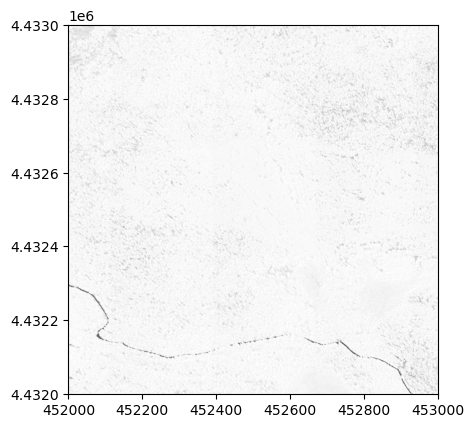

In [24]:
serc_plot = plt.imshow(b56,extent=serc_ext,cmap='Greys') 

We can see that this image looks pretty washed out. To see why this is, it helps to look at the range and distribution of reflectance values that we are plotting. We can do this by making a histogram. 

## Plot histogram

We can plot a histogram using the `matplotlib.pyplot.hist` function. Note that this function won't work if there are any NaN values, so we can ensure we are only plotting the real data values using the call below. You can also specify the # of bins you want to divide the data into. 

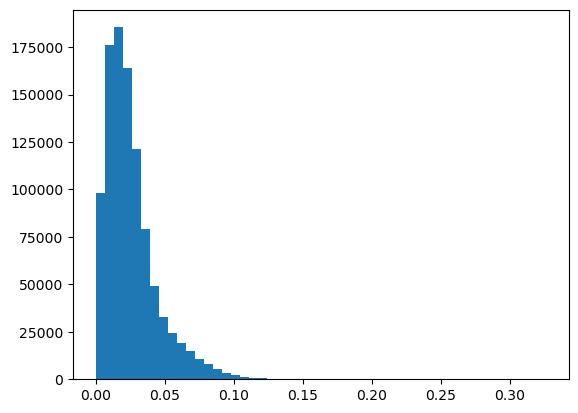

In [25]:
plt.hist(b56[~np.isnan(b56)],50); #50 signifies the # of bins

We can see that most of the reflectance values are < 0.4. In order to show more contrast in the image, we can adjust the colorlimit (`clim`) to 0-0.4:

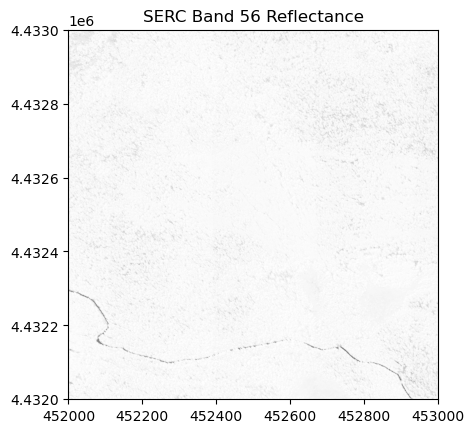

In [26]:
fig, ax = plt.subplots()
serc_plot = ax.imshow(b56,extent=serc_ext,cmap='Greys',clim=(0,0.4)) 
plt.title('SERC Band 56 Reflectance');

# Plot RGB

In [27]:
blue_band = serc_reflArray[:,:,20].astype(float)
blue_band[blue_band==int(noDataValue)]=np.nan
blue_band = blue_band/scaleFactor

green_band = serc_reflArray[:,:,37].astype(float)
green_band[green_band==int(noDataValue)]=np.nan
green_band = green_band/scaleFactor

red_band = serc_reflArray[:,:,55].astype(float)
red_band[red_band==int(noDataValue)]=np.nan
red_band = red_band/scaleFactor

rgb = np.array([red_band, green_band, blue_band])

rgb.shape

(3, 1000, 1000)

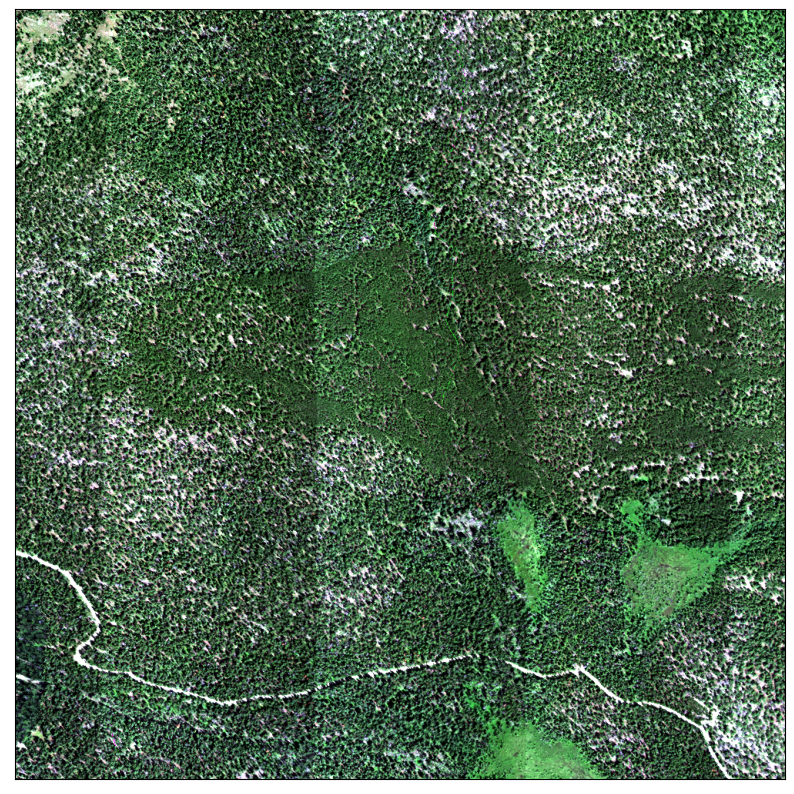

In [28]:
ep.plot_rgb(rgb, stretch=True)

plt.show()

Here you can see that adjusting the colorlimit displays features (eg. roads, buildings) much better than when we set the colormap limits to the entire range of reflectance values. 

# Classify the Data

In [29]:
data_arr = serc_reflArray.__array__()

data_arr_flat = (data_arr.shape[0] * data_arr.shape[1],
                    data_arr.shape[2])

img_as_array = data_arr[:, :, :426].reshape(data_arr_flat)

In [30]:
prediction = KMeans(n_clusters=3).fit_predict(img_as_array)

In [31]:
prediction_reshape = np.rot90(np.fliplr(prediction.reshape(data_arr[:, :, 0].shape)))

In [32]:
cat_names = ["Group 1", "Group 2", "Group 3"]

colors = ["darkgreen",
          "lime", 
          "white"]

custom_cmap = ListedColormap(colors)

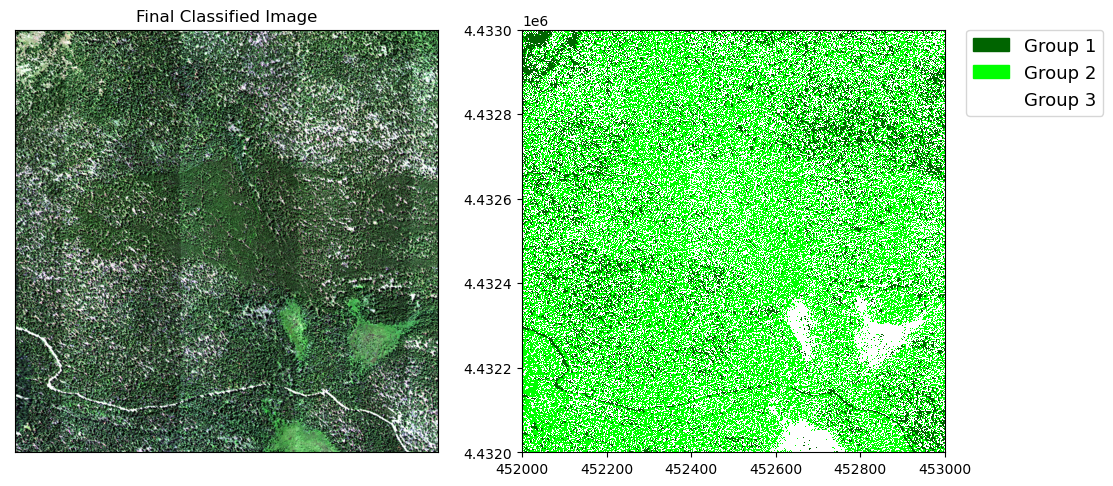

In [33]:
f, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 12))

ax.set(title="Original Data")

classes = np.unique(prediction_reshape)
classes = classes.tolist()[:5]

im = ax2.imshow(prediction_reshape.transpose([1, 0]),
                cmap=custom_cmap,
                extent=serc_ext,
                interpolation='none')

ep.draw_legend(im_ax=im,
               titles=cat_names, 
               classes=classes)

ep.plot_rgb(rgb, ax=ax, extent=serc_ext, stretch=True)

ax.set_title("Final Classified Image")

plt.show()

# Drone Data

In [34]:
drone_data = rxr.open_rasterio(os.path.join(data_path, "m300-NIWO-p2-6-23-22-ortho.tif"), masked=True)

drone_data_arr = drone_data.values[:10]
drone_data_arr.shape

(10, 2541, 2203)

In [35]:
drone_reshape = drone_data_arr.transpose([2, 1, 0])

drone_data_flat = (drone_reshape.shape[0] * drone_reshape.shape[1], drone_reshape.shape[2])

drone_as_array = drone_reshape[:, :, :10].reshape(drone_data_flat)

In [36]:
drone_prediction = KMeans(n_clusters=3).fit_predict(drone_as_array)

In [37]:
drone_prediction_reshape = drone_prediction.reshape(drone_reshape[:, :, 0].shape)

In [38]:
drone_bounds = drone_data.rio.bounds()
drone_extent = plotting_extent(drone_data[0], drone_data.rio.transform())
drone_bounds

(452373.2260779495, 4432107.120842222, 452529.8128946495, 4432287.732327122)

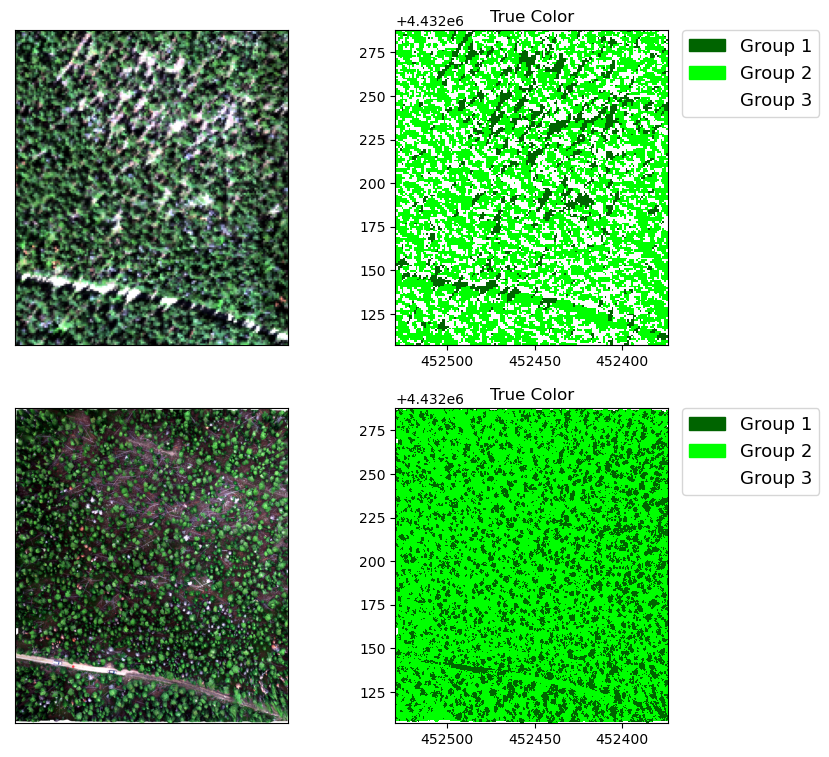

In [39]:
f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))

ax.set(title="Hyperspectral Data",
       ylim=[drone_bounds[1], drone_bounds[3]], 
       xlim=[drone_bounds[2], drone_bounds[0]])

ax2.set(title="True Color",
        ylim=[drone_bounds[1], drone_bounds[3]], 
        xlim=[drone_bounds[2], drone_bounds[0]])

ax3.set(title="Drone Data",
       ylim=[drone_bounds[1], drone_bounds[3]], 
       xlim=[drone_bounds[2], drone_bounds[0]])

ax4.set(title="True Color",
        ylim=[drone_bounds[1], drone_bounds[3]], 
        xlim=[drone_bounds[2], drone_bounds[0]])

ep.plot_rgb(rgb, ax=ax, extent=serc_ext, stretch=True)

im = ax2.imshow(prediction_reshape.transpose([1, 0]),
                cmap=custom_cmap,
                extent=serc_ext,
                interpolation='none')


ep.draw_legend(im_ax=im,
               titles=cat_names, 
               classes=classes)


ep.plot_rgb(drone_data_arr, [5, 3, 1], stretch=True, ax=ax3, extent=drone_extent)


im3 = ax4.imshow(drone_prediction_reshape.transpose([1, 0]),
                 cmap=custom_cmap,
                 extent=drone_extent,
                 interpolation='none')


ep.draw_legend(im_ax=im3,
               titles=cat_names, 
               classes=classes)

plt.show()